# Capstone Project - New Hotel Opportunity in Thailand
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

Tourism is an economic contributor to Thailand (with more than 20% of Thailand's GDP), Travel restriction due to COVID-19 pandemic will for sure causes tremendous shrink in Thailand's GDP. But this situation will not stay forever. When the pandemic is over, lots of traveller will begin thier journey to Thailand again. Therefore, this is a good opportunity to find an optimal location to start new resort in Thailand.

There are lots of traveling province in Thailand. Start from mountainous area in Northern part like Chaing mai, Chiang rai down to the Southern part where tons of beautiful tropical beach lay there (suchas Koh samui : Surat Thani, Krabi, Phuket). So in beginning part of our project we'll try to figure out which province will be focused based on thier traveling income per number of hotel rooms.

For focused province, we will try to detect **locations that are not already crowded with resorts**. We are also particularly interested in **areas with filled with community and facilities**. We would also prefer location **as close to city center as possible**, assuming that first two conditions are met.

We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* traveling income per number of hotel rooms of each province
* number of existing hotels in the neighborhood 
* number of and distance to resort in the neighborhood, if any
* distance of neighborhood from city center

We decided to use regularly spaced grid of locations, centered around city center, to define our neighborhoods.

Following data sources will be needed to extract/generate the required information:
* Travelling income and number of hotel rooms by province from National Statistical Office of Thailand
* centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using **ARCGIS reverse geocoding API**
* number of hotels and their type and location in every neighborhood will be obtained using **Foursquare API**
* coordinate of focused province city center will be obtained using **ARCGIS geocoding API**

### Potential province 

Let's start by import data from National Statistical Office of Thailand

First of all, let's import required module for our work

In [1]:
!pip install xlrd
!pip install geocoder

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import json
import urllib
import folium
print('Module sucessfully imported!')

Module sucessfully imported!


In [3]:
df = pd.read_excel('http://statbbi.nso.go.th/staticreport/Page/sector/TH/report/sector_17_19_TH_.xlsx')

Since excel files consist of lots of merged cells, Let's start by unmerged it and fill blank data with ffill method

In [4]:
df = df.iloc[2:,:]
df.columns = ['Area','Province','Main','Sub','Type','2552','2553','2554','2555','2556','2557','2558','2559','2560','2561']
df.reset_index()
df=df.iloc[1:,:]
df.fillna(method='ffill',inplace = True)
df.reset_index()
df.drop(df.index[2497], inplace = True)
df.set_index(['Province'],inplace = True)
df.head(20)

Area                              Main  \
Province                                                             
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร      ระยะเวลาพำนักโดยเฉลี่ย (วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร      ระยะเวลาพำนักโดยเฉลี่ย (วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร      ระยะเวลาพำนักโดยเฉลี่ย (วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร  ค่าใช้จ่ายโดยเฉลี่ย (บาท/คน/วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร  ค่าใช้จ่ายโดยเฉลี่ย (บาท/คน/วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร  ค่าใช้จ่ายโดยเฉลี่ย (บาท/คน/วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร  ค่าใช้จ่ายโดยเฉลี่ย (บาท/คน/วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร  ค่าใช้จ่ายโดยเฉลี่ย (บาท/คน/วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร  ค่าใช้จ่ายโดยเฉลี่ย (บาท/คน/วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร  ค่าใช้จ่ายโดยเฉลี่ย (บาท/คน/วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร  ค่าใช้จ่ายโดยเฉลี่ย (บาท/คน/วัน)   

                                Sub           Type       2552       2553  \
Province                                                                   
ทั่วราชอาณาจักร                 รวม            รวม  124869207  156437103   
ทั่วราชอาณาจักร                 รวม         ชาวไทย   97998957  122522114   
ทั่วราชอาณาจักร                 รวม  ชาวต่างประเทศ   26870250   33914989   
ทั่วราชอาณาจักร  จำนวนนักท่องเที่ยว            รวม   77235686   96933869   
ทั่วราชอาณาจักร  จำนวนนักท่องเที่ยว         ชาวไทย   54698887   68463373   
ทั่วราชอาณาจักร  จำนวนนักท่องเที่ยว  ชาวต่างประเทศ   22536799   28470496   
ทั่วราชอาณาจักร     จำนวนนักทัศนาจร            รวม   47633521   59503234   
ทั่วราชอาณาจักร     จำนวนนักทัศนาจร         ชาวไทย   43300070   54058741   
ทั่วราชอาณาจักร     จำนวนนักทัศนาจร  ชาวต่างประเทศ    4333451    5444493   
ทั่วราชอาณาจักร                 รวม            รวม    3.16838    3.11153   
ทั่วราชอาณาจักร                 รวม         ชาวไทย    2.35258     2.5883   
ทั่วราชอาณาจักร                 รวม  ชาวต่างประเทศ    5.14841    4.36975   
ทั่วราชอาณาจักร                 รวม  ชาวต่างประเทศ          0          0   
ทั่วราชอาณาจักร      ผู้เยี่ยมเยือน            รวม    2451.12    2504.27   
ทั่วราชอาณาจักร      ผู้เยี่ยมเยือน         ชาวไทย    1540.63    1740.38   
ทั่วราชอาณาจักร      ผู้เยี่ยมเยือน  ชาวต่างประเทศ     3752.1    3864.73   
ทั่วราชอาณาจักร       นักท่องเที่ยว            รวม    2726.68    2778.37   
ทั่วราชอาณาจักร       นักท่องเที่ยว         ชาวไทย    1723.53    1944.01   
ทั่วราชอาณาจักร       นักท่องเที่ยว  ชาวต่างประเทศ    3839.25     3966.8   
ทั่วราชอาณาจักร          นักทัศนาจร            รวม    1035.43    1114.94   

                         2554          2555          2556          2557  \
Province                                                                  
ทั่วราชอาณาจักร  1.741184e+08  1.989875e+08  2.171124e+08  2.276541e+08   
ทั่วราชอาณาจักร  1.331777e+08  1.505094e+08  1.617247e+08  1.702481e+08   
ทั่วราชอาณาจักร  4.094065e+07  4.847814e+07  5.538775e+07  5.740595e+07   
ทั่วราชอาณาจักร  1.115750e+08  1.281156e+08  1.418499e+08  1.474086e+08   
ทั่วราชอาณาจักร  7.569842e+07  8.641345e+07  9.413069e+07  9.890221e+07   
ทั่วราชอาณาจักร  3.587658e+07  4.170211e+07  4.771917e+07  4.850642e+07   
ทั่วราชอาณาจักร  6.254339e+07  7.087194e+07  7.526258e+07  8.024542e+07   
ทั่วราชอาณาจักร  5.747931e+07  6.409591e+07  6.759400e+07  7.134589e+07   
ทั่วราชอาณาจักร  5.064074e+06  6.776036e+06  7.668583e+06  8.899

Dataframe df contain too much information for our study, let's drop out unnecessary information

In [5]:
year_to_drop = list(map(str,range(2552,2561)))
year_to_drop

['2552', '2553', '2554', '2555', '2556', '2557', '2558', '2559', '2560']

In [6]:
df = df.drop(columns = year_to_drop)
df.head(20)

Area                              Main  \
Province                                                             
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร               จำนวนผู้เยี่ยมเยือน   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร      ระยะเวลาพำนักโดยเฉลี่ย (วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร      ระยะเวลาพำนักโดยเฉลี่ย (วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร      ระยะเวลาพำนักโดยเฉลี่ย (วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร  ค่าใช้จ่ายโดยเฉลี่ย (บาท/คน/วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร  ค่าใช้จ่ายโดยเฉลี่ย (บาท/คน/วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร  ค่าใช้จ่ายโดยเฉลี่ย (บาท/คน/วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร  ค่าใช้จ่ายโดยเฉลี่ย (บาท/คน/วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร  ค่าใช้จ่ายโดยเฉลี่ย (บาท/คน/วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร  ค่าใช้จ่ายโดยเฉลี่ย (บาท/คน/วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร  ค่าใช้จ่ายโดยเฉลี่ย (บาท/คน/วัน)   
ทั่วราชอาณาจักร  ทั่วราชอาณาจักร  ค่าใช้จ่ายโดยเฉลี่ย (บาท/คน/วัน)   

                                Sub           Type          2561  
Province                                                          
ทั่วราชอาณาจักร                 รวม            รวม  3.030192e+08  
ทั่วราชอาณาจักร                 รวม         ชาวไทย  2.277741e+08  
ทั่วราชอาณาจักร                 รวม  ชาวต่างประเทศ  7.524508e+07  
ทั่วราชอาณาจักร  จำนวนนักท่องเที่ยว            รวม  1.924750e+08  
ทั่วราชอาณาจักร  จำนวนนักท่องเที่ยว         ชาวไทย  1.308679e+08  
ทั่วราชอาณาจักร  จำนวนนักท่องเที่ยว  ชาวต่างประเทศ  6.160705e+07  
ทั่วราชอาณาจักร     จำนวนนักทัศนาจร            รวม  1.105443e+08  
ทั่วราชอาณาจักร     จำนวนนักทัศนาจร         ชาวไทย  9.690624e+07  
ทั่วราชอาณาจักร     จำนวนนักทัศนาจร  ชาวต่างประเทศ  1.363803e+07  
ทั่วราชอาณาจักร                 รวม            รวม  3.070000e+00  
ทั่วราชอาณาจักร                 รวม         ชาวไทย  2.500000e+00  
ทั่วราชอาณาจักร                 รวม  ชาวต่างประเทศ  4.290000e+00  
ทั่วราชอาณาจักร                 รวม  ชาวต่างประเทศ  4.290000e+00  
ทั่วราชอาณาจักร      ผู้เยี่ยมเยือน            รวม  3.843700e+03  
ทั่วราชอาณาจักร      ผู้เยี่ยมเยือน         ชาวไทย  2.526300e+03  
ทั่วราชอาณาจักร      ผู้เยี่ยมเยือน  ชาวต่างประเทศ  5.853840e+03  
ทั่วราชอาณาจักร       นักท่องเที่ยว            รวม  4.283550e+03  
ทั่วราชอาณาจักร       นักท่องเที่ยว         ชาวไทย  2.865600e+03  
ทั่วราชอาณาจักร       นักท่องเที่ยว  ชาวต่างประเทศ  6.038820e+03  
ทั่วราชอาณาจักร          นักทัศนาจร            รวม  1.490320e+03

In [7]:
df = df[(df.Type == 'รวม')
#         |(df.Main == 'จำนวนผู้เยี่ยมเยือน') | 
#         (df.Main == r'ระยะเวลาพำนักโดยเฉลี่ย (วัน)') | 
#         (df.Main == r'รายได้การท่องเที่ยว (ล้านบาท)') | 
#         (df.Main == 'สถานประกอบการที่พักแรม' )
       ]

In [8]:
df['Overnight_visitor'] = np.where(df['Sub']=='จำนวนผู้ที่มาเข้าพัก', df['2561'], 0)
df['Nights'] = np.where(df['Main']=='ระยะเวลาพำนักโดยเฉลี่ย (วัน)', df['2561'], 0)
df['Travel_income'] = np.where(df['Main']=='รายได้การท่องเที่ยว (ล้านบาท)', df['2561'], 0)
df['Rooms'] = np.where(df['Sub']=='จำนวนห้อง', df['2561'], 0)
df.drop(columns=['Main','Sub','Type','2561'],inplace = True)

Finally, we'll get desired dataframe as follow

In [9]:
df = df.groupby(df.index).sum()
df.head(20)

Overnight_visitor  Nights  Travel_income     Rooms
Province                                                           
กระบี่                   4186576.0    4.41      115176.70   21853.0
กรุงเทพมหานคร           35810567.0    3.87     1040509.51  152616.0
กาญจนบุรี                3293965.0    2.29       26796.40   16451.0
กาฬสินธุ์                 247539.0    2.54        1223.11    1109.0
กำแพงเพชร                 442748.0    2.05        1631.70    2382.0
ขอนแก่น                  2234818.0    2.63       17231.62    9676.0
จันทบุรี                 1598231.0    2.19        8520.18    6227.0
ฉะเชิงเทรา                487443.0    1.80        4994.01    1506.0
ชลบุรี                  14880369.0    3.40      264543.05   66532.0
ชัยนาท                    281801.0    1.96        1321.59     927.0
ชัยภูมิ                   914915.0    2.05        2234.17    3118.0
ชุมพร                    1207608.0    2.48        7488.61    5123.0
ตรัง                     1139743.0    2.38        9746.85    4181.0
ตราด                     1960838.0    3.08       19295.58   11366.0
ตาก                      1704375.0    2.00        7092.85    6522.0
ทั่วราชอาณาจักร        166706140.0    3.07     2698310.23  746400.0
นครนายก                  1688459.0    1.85        7461.55    5494.0
นครปฐม                   1338269.0    1.76        6135.99    4348.0
นครพนม                    456478.0    2.46        2136.23    2532.0
นครราชสีมา               5527714.0    2.15       24340.39   18595.0

In [10]:
df['Income/rooms/year'] = df['Travel_income']/df['Rooms']
df.sort_values('Province', ascending=False, inplace = True)

Let's drop the row that contain information for whole country

In [11]:
df.drop(index='ทั่วราชอาณาจักร', inplace = True)


Confirm row has been dropped out by dataframe shape

In [12]:
df.shape

(77, 5)

In [13]:
df.index

Index(['แม่ฮ่องสอน', 'แพร่', 'เลย', 'เพชรบูรณ์', 'เพชรบุรี', 'เชียงใหม่',
       'เชียงราย', 'อ่างทอง', 'อุบลราชธานี', 'อุทัยธานี', 'อุตรดิตถ์',
       'อุดรธานี', 'อำนาจเจริญ', 'หนองบัวลำภู', 'หนองคาย', 'สุโขทัย',
       'สุรินทร์', 'สุราษฎร์ธานี', 'สุพรรณบุรี', 'สิงห์บุรี', 'สระแก้ว',
       'สระบุรี', 'สมุทรสาคร', 'สมุทรสงคราม', 'สมุทรปราการ', 'สตูล', 'สงขลา',
       'สกลนคร', 'ศรีสะเกษ', 'ลำพูน', 'ลำปาง', 'ลพบุรี', 'ร้อยเอ็ด', 'ราชบุรี',
       'ระยอง', 'ระนอง', 'ยโสธร', 'ยะลา', 'มุกดาหาร', 'มหาสารคาม', 'ภูเก็ต',
       'พิษณุโลก', 'พิจิตร', 'พัทลุง', 'พังงา', 'พะเยา', 'พระนครศรีอยุธยา',
       'ปัตตานี', 'ปราจีนบุรี', 'ประจวบคีรีขันธ์', 'ปทุมธานี', 'บุรีรัมย์',
       'บึงกาฬ', 'น่าน', 'นราธิวาส', 'นนทบุรี', 'นครสวรรค์', 'นครศรีธรรมราช',
       'นครราชสีมา', 'นครพนม', 'นครปฐม', 'นครนายก', 'ตาก', 'ตราด', 'ตรัง',
       'ชุมพร', 'ชัยภูมิ', 'ชัยนาท', 'ชลบุรี', 'ฉะเชิงเทรา', 'จันทบุรี',
       'ขอนแก่น', 'กำแพงเพชร', 'กาฬสินธุ์', 'กาญจนบุรี', 'กรุงเทพมหานคร',
       'กระบี่'],
      d

#### Import  Thailand's geojson file to plot choropleth map

In [14]:
# download countries geojson file
!wget --quiet https://raw.githubusercontent.com/apisit/thailand.json/master/thailand.json -O thailand.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [15]:
thailand_geo = r'thailand.json'
url = r'https://raw.githubusercontent.com/apisit/thailand.json/master/thailand.json'
json_url = urllib.request.urlopen(url)
data = json.loads(json_url.read())

In [16]:
Province_eng = list()
for feat in data['features']:
    Province_eng.append(feat['properties']['name'])

In [17]:
Province_eng.sort()
Province_eng

['Amnat Charoen',
 'Ang Thong',
 'Bangkok Metropolis',
 'Bueng Kan',
 'Buri Ram',
 'Chachoengsao',
 'Chai Nat',
 'Chaiyaphum',
 'Chanthaburi',
 'Chiang Mai',
 'Chiang Rai',
 'Chon Buri',
 'Chumphon',
 'Kalasin',
 'Kamphaeng Phet',
 'Kanchanaburi',
 'Khon Kaen',
 'Krabi',
 'Lampang',
 'Lamphun',
 'Loei',
 'Lop Buri',
 'Mae Hong Son',
 'Maha Sarakham',
 'Mukdahan',
 'Nakhon Nayok',
 'Nakhon Pathom',
 'Nakhon Phanom',
 'Nakhon Ratchasima',
 'Nakhon Sawan',
 'Nakhon Si Thammarat',
 'Nan',
 'Narathiwat',
 'Nong Bua Lam Phu',
 'Nong Khai',
 'Nonthaburi',
 'Pathum Thani',
 'Pattani',
 'Phangnga',
 'Phatthalung',
 'Phayao',
 'Phetchabun',
 'Phetchaburi',
 'Phichit',
 'Phitsanulok',
 'Phra Nakhon Si Ayutthaya',
 'Phrae',
 'Phuket',
 'Prachin Buri',
 'Prachuap Khiri Khan',
 'Ranong',
 'Ratchaburi',
 'Rayong',
 'Roi Et',
 'Sa Kaeo',
 'Sakon Nakhon',
 'Samut Prakan',
 'Samut Sakhon',
 'Samut Songkhram',
 'Saraburi',
 'Satun',
 'Si Sa Ket',
 'Sing Buri',
 'Songkhla',
 'Sukhothai',
 'Suphan Buri',
 

Mapping province name which only provided in Thai with English name according to GeoJSON file

In [18]:
Province = ['Mae Hong Son','Phrae','Loei','Phetchabun','Phetchaburi', 'Chiang Mai',
 'Chiang Rai','Ang Thong','Ubon Ratchathani','Uthai Thani','Uttaradit','Udon Thani','Amnat Charoen','Nong Bua Lam Phu',
 'Nong Khai','Sukhothai','Surin','Surat Thani','Suphan Buri', 'Sing Buri', 'Sa Kaeo', 'Saraburi','Samut Sakhon','Samut Songkhram', 'Samut Prakan',
            'Satun','Songkhla', 'Sakon Nakhon','Si Sa Ket', 'Lamphun','Lampang', 'Lop Buri', 'Roi Et', 'Ratchaburi',
 'Rayong', 'Ranong', 'Yasothon','Yala','Mukdahan', 'Maha Sarakham','Phuket','Phitsanulok','Phichit','Phatthalung', 'Phangnga', 'Phayao', 'Phra Nakhon Si Ayutthaya','Pattani', 'Prachin Buri', 'Prachuap Khiri Khan',
            'Pathum Thani', 'Buri Ram','Bueng Kan', 'Nan',
 'Narathiwat', 'Nonthaburi','Nakhon Sawan',
 'Nakhon Si Thammarat', 'Nakhon Ratchasima', 'Nakhon Phanom', 'Nakhon Pathom', 'Nakhon Nayok','Tak','Trat','Trang', 'Chumphon','Chaiyaphum',
           'Chai Nat', 'Chon Buri', 'Chachoengsao','Chanthaburi', 'Khon Kaen','Kamphaeng Phet','Kalasin','Kanchanaburi','Bangkok Metropolis', 'Krabi',]

In [19]:
df['Province_eng'] = Province
df.reset_index(inplace = True)
df.head(10)

Province  Overnight_visitor  Nights  Travel_income    Rooms  \
0   แม่ฮ่องสอน          1017154.0    2.23        5216.28   6156.0   
1         แพร่           365047.0    1.89        1722.39   1714.0   
2          เลย          1242447.0    2.26        4610.14   5933.0   
3    เพชรบูรณ์          2000241.0    2.30        7533.70   6332.0   
4     เพชรบุรี          3895640.0    2.29       31574.46  11096.0   
5    เชียงใหม่          8360997.0    2.96      107625.32  36186.0   
6     เชียงราย          3142005.0    2.54       28617.71  17003.0   
7      อ่างทอง           183550.0    1.59         993.54    498.0   
8  อุบลราชธานี          1428571.0    2.49        7999.25   4694.0   
9    อุทัยธานี           375449.0    1.98        1397.39   2117.0   

   Income/rooms/year      Province_eng  
0           0.847349      Mae Hong Son  
1           1.004895             Phrae  
2           0.777034              Loei  
3           1.189782        Phetchabun  
4           2.845571       Phetchaburi  
5           2.974225        Chiang Mai  
6           1.683098        Chiang Rai  
7           1.995060         Ang Thong  
8           1.704144  Ubon Ratchathani  
9           0.660080       Uthai Thani

#### Sort dataframe by Income/room/year to show potential province for investment

In [20]:
df['Income/room/year'] = df['Travel_income']/df['Rooms']
df.sort_values('Income/room/year', ascending = False, inplace = True)
df.reindex(columns = ['Province_eng','Province','Overnight_visitor','Nights','Travel_income','Rooms','Income/room/year'])

Province_eng       Province  Overnight_visitor  Nights  \
75  Bangkok Metropolis  กรุงเทพมหานคร         35810567.0    3.87   
40              Phuket         ภูเก็ต         12834961.0    4.18   
76               Krabi         กระบี่          4186576.0    4.41   
44            Phangnga          พังงา          1081049.0    5.27   
68           Chon Buri         ชลบุรี         14880369.0    3.40   
..                 ...            ...                ...     ...   
27        Sakon Nakhon         สกลนคร           697419.0    2.47   
9          Uthai Thani      อุทัยธานี           375449.0    1.98   
32              Roi Et       ร้อยเอ็ด           445989.0    2.36   
13    Nong Bua Lam Phu    หนองบัวลำภู           153007.0    2.25   
39       Maha Sarakham      มหาสารคาม           416903.0    2.14   

    Travel_income     Rooms  Income/room/year  
75     1040509.51  152616.0          6.817827  
40      449100.73   84707.0          5.301814  
76      115176.70   21853.0          5.270521  
44       52014.56   12356.0          4.209660  
68      264543.05   66532.0          3.976178  
..            ...       ...               ...  
27        2407.00    3555.0          0.677075  
9         1397.39    2117.0          0.660080  
32        1465.83    2280.0          0.642908  
13         418.29     660.0          0.633773  
39        1160.82    2058.0          0.564052  

[77 rows x 7 columns]

#### Create choropleth map visualizing potential province

In [21]:
# create a plain world map
Thailand_map = folium.Map(location=[13.03887, 101.490104], zoom_start=5, width = 500, height = 500)

In [22]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
Thailand_map.choropleth(
    geo_data=thailand_geo,
    data=df,
    columns=['Province_eng', 'Income/room/year'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Traveling income per room per year (MB/rooms/year)'
)

# display map
Thailand_map

From above map and df, apart from Bangkok metropolis, potential provinces are spread along southern part of Thailand, the most potential province we'll focus on our further study will be **Phuket**

### Define Neighborhood Candidate
First, let's import List of postal codes of Phuket (Manually created)

In [23]:
df_phuket = pd.read_csv('Phuket_Postal.csv')

In [24]:
df_phuket

Postal Code        Borough          Neighborhood
0         83000  Mueang Phuket         Mueang Phuket
1         83000  Mueang Phuket        Tambon Chalong
2         83000  Mueang Phuket        Tambon Ko Kaeo
3         83000  Mueang Phuket        Tambon Ratsada
4         83000  Mueang Phuket     Tambon Talat Nuea
5         83000  Mueang Phuket      Tambon Talat Yai
6         83000  Mueang Phuket         Tambon Wichit
7         83100          Rawai                 Karon
8         83100          Rawai                 Rawai
9         83100          Rawai          Tambon Karon
10        83100          Rawai          Tambon Rawai
11        83110        Thalang          Choeng Thale
12        83110        Thalang   Tambon Choeng Thale
13        83110        Thalang       Tambon Mai Khao
14        83110        Thalang        Tambon Pa Klok
15        83110        Thalang         Tambon Sa Khu
16        83110        Thalang     Tambon Si Sunthon
17        83110        Thalang  Tambon Thep Krasatti
18        83110        Thalang               Thalang
19        83120          Kathu                 Kathu
20        83120          Kathu         Tambon Kamala
21        83120          Kathu          Tambon Kathu
22        83120          Kathu         Tambon Patong
23        83130        Chalong        Tambon Chalong
24        83140  Tambon Sa Khu         Tambon Sa Khu
25        83150         Patong                 Kathu
26        83150         Patong                Patong
27        83150         Patong         Tambon Patong

In [25]:
import geocoder #import geocoder

In [26]:
import getpass
#Credential of Arcgis API
username = getpass.getpass('Enter your username')
password = getpass.getpass('Enter your password')

Enter your username ·········
Enter your password ·········


In [27]:
!pip install arcgis
import arcgis
from arcgis.geocoding import geocode, reverse_geocode,Geocoder, get_geocoders
from arcgis.gis import GIS
gis = GIS("https://www.arcgis.com", username, password)
print("Successful")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/conda/envs/python/lib/python3

Successful


In [28]:
#Define get_latlng function to get geospatial location from arcgis (since google is not free now)
def get_latlng(BorNeigh):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Phuket,Thailand'.format(BorNeigh))
        lati_long_coords = g.latlng
    return lati_long_coords

In [29]:
Bor = df_phuket['Borough'].tolist()
Neigh = df_phuket['Neighborhood'].tolist()
BorNeigh = []

In [30]:
for i in range(0,df_phuket.shape[0]):
    Bor[i] = Bor[i] + ", "
    BorNeigh.append(Bor[i]+Neigh[i])

In [31]:
coords = [ get_latlng(Borlist) for Borlist in BorNeigh]

In [32]:
lat = list()
long = list()
for co in coords:
    lat.append(co[0])
    long.append(co[1])
#inser lat long into df
df_phuket['Latitude'] = lat
df_phuket['Longtitude'] = long

In [33]:
df_phuket.drop_duplicates(subset=['Latitude','Longtitude'], inplace = True)
df_phuket.reset_index().drop(columns='index')

Postal Code        Borough          Neighborhood  Latitude  Longtitude
0         83000  Mueang Phuket         Mueang Phuket  7.889464   98.385307
1         83000  Mueang Phuket     Tambon Talat Nuea  7.883148   98.390848
2         83000  Mueang Phuket      Tambon Talat Yai  7.884807   98.390801
3         83100          Rawai                 Karon  7.816509   98.299824
4         83100          Rawai                 Rawai  7.770598   98.318517
5         83100          Rawai          Tambon Rawai  7.781444   98.311044
6         83110        Thalang          Choeng Thale  7.988448   98.313159
7         83110        Thalang       Tambon Mai Khao  8.031753   98.333984
8         83110        Thalang        Tambon Pa Klok  8.065902   98.391303
9         83110        Thalang         Tambon Sa Khu  8.081167   98.296167
10        83110        Thalang     Tambon Si Sunthon  8.007116   98.350904
11        83110        Thalang  Tambon Thep Krasatti  8.022879   98.349048
12        83120          Kathu                 Kathu  7.908981   98.333378
13        83120          Kathu         Tambon Kamala  7.945379   98.287437
14        83120          Kathu         Tambon Patong  7.903790   98.311680
15        83130        Chalong        Tambon Chalong  7.832567   98.345170
16        83140  Tambon Sa Khu         Tambon Sa Khu  8.071626   98.296361
17        83150         Patong                 Kathu  7.898355   98.304875

#### Let's create a function to repeat get near by venues in Phuket

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *phuket_venues*.

In [35]:
import requests

In [36]:
CLIENT_ID = '0IW4FOPVX4KC41GJ1SOS2YRNV1RFAMKAUN4QRAKJIHUBPFDQ' # your Foursquare ID
CLIENT_SECRET = 'B331GGOZC4WZQ2JUQCJJBRDJASH4ERNFPNPEDCQTX2QLHJ2T' # your Foursquare Secret
VERSION = '20200601' # Foursquare API version
LIMIT = 100
radius = 6000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0IW4FOPVX4KC41GJ1SOS2YRNV1RFAMKAUN4QRAKJIHUBPFDQ
CLIENT_SECRET:B331GGOZC4WZQ2JUQCJJBRDJASH4ERNFPNPEDCQTX2QLHJ2T


In [37]:
phuket_venues = getNearbyVenues(names=df_phuket['Neighborhood'],
                                   latitudes=df_phuket['Latitude'],
                                   longitudes=df_phuket['Longtitude']
                                  )




Mueang Phuket
Tambon Talat Nuea
Tambon Talat Yai
Karon
Rawai
Tambon Rawai
Choeng Thale
Tambon Mai Khao
Tambon Pa Klok
Tambon Sa Khu
Tambon Si Sunthon
Tambon Thep Krasatti
Kathu
Tambon Kamala
Tambon Patong
Tambon Chalong
Tambon Sa Khu
Kathu


In [38]:
print(phuket_venues.shape)
phuket_venues.head()

(350, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Mueang Phuket               7.889464               98.385307   
1  Mueang Phuket               7.889464               98.385307   
2  Mueang Phuket               7.889464               98.385307   
3  Mueang Phuket               7.889464               98.385307   
4  Mueang Phuket               7.889464               98.385307   

           Venue  Venue Latitude  Venue Longitude      Venue Category  
0     Brown Café        7.889526        98.386904         Coffee Shop  
1  ขนมจีนแม่ติ่ง        7.888837        98.385238     Thai Restaurant  
2   ราชรส ติ่มซำ        7.891041        98.385968  Dim Sum Restaurant  
3   FACTORY CAFE        7.888467        98.384845                Café  
4     Beautyland        7.888774        98.384239      Cosmetics Shop

In [39]:
phuket_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                              
Choeng Thale                           8                       8      8   
Karon                                 34                      34     34   
Kathu                                 51                      51     51   
Mueang Phuket                         37                      37     37   
Rawai                                 25                      25     25   
Tambon Chalong                        12                      12     12   
Tambon Kamala                          7                       7      7   
Tambon Mai Khao                        6                       6      6   
Tambon Patong                         12                      12     12   
Tambon Rawai                          15                      15     15   
Tambon Sa Khu                          5                       5      5   
Tambon Si Sunthon                      3                       3      3   
Tambon Talat Nuea                     65                      65     65   
Tambon Talat Yai                      70                      70     70   

                   Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                        
Choeng Thale                    8                8               8  
Karon                          34               34              34  
Kathu                          51               51              51  
Mueang Phuket                  37               37              37  
Rawai                          25               25              25  
Tambon Chalong                 12               12              12  
Tambon Kamala                   7                7               7  
Tambon Mai Khao                 6                6               6  
Tambon Patong                  12               12              12  
Tambon Rawai                   15               15              15  
Tambon Sa Khu                   5                5               5  
Tambon Si Sunthon               3                3               3  
Tambon Talat Nuea              65               65              65  
Tambon Talat Yai               70               70              70

In [40]:
print('There are {} uniques categories.'.format(len(phuket_venues['Venue Category'].unique())))

There are 79 uniques categories.


## Analyze Each Neighborhood

In [41]:
# one hot encoding
phuket_onehot = pd.get_dummies(phuket_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
phuket_onehot['Neighborhood'] = phuket_venues['Neighborhood'] 

# move neighborhood column to the first column
# fixed_columns = [phuket_onehot.columns[-1]] + list(phuket_onehot.columns[:-1])
# phuket_onehot = phuket_onehot[fixed_columns]

re_columns = []
for col in phuket_onehot.columns:
    if col == 'Neighborhood':
        re_columns.insert(0,col)
    else : re_columns.append(col)

In [42]:
phuket_onehot.columns = re_columns
phuket_onehot['Neighborhood'] = phuket_venues['Neighborhood'] 
phuket_onehot.head()

Neighborhood  Art Museum  Asian Restaurant  Athletics & Sports  \
0  Mueang Phuket           0                 0                   0   
1  Mueang Phuket           0                 0                   0   
2  Mueang Phuket           0                 0                   0   
3  Mueang Phuket           0                 0                   0   
4  Mueang Phuket           0                 0                   0   

   Australian Restaurant  BBQ Joint  Bakery  Bar  Beach  Bed & Breakfast  ...  \
0                      0          0       0    0      0                0  ...   
1                      0          0       0    0      0                0  ...   
2                      0          0       0    0      0                0  ...   
3                      0          0       0    0      0                0  ...   
4                      0          0       0    0      0                0  ...   

   Souvenir Shop  Spa  Stadium  Steakhouse  Surf Spot  Tea Room  \
0              0    0        0           0          0         0   
1              0    0        0           0          0         0   
2              0    0        0           0          0         0   
3              0    0        0           0          0         0   
4              0    0        0           0          0         0   

   Thai Restaurant  Vegetarian / Vegan Restaurant  Yoga Studio  Zoo  
0                0                              0            0    0  
1                1                              0            0    0  
2                0                              0            0    0  
3                0                              0            0    0  
4                0                              0            0    0  

[5 rows x 79 columns]

And let's examine the new dataframe size.

In [43]:
phuket_onehot.shape

(350, 79)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [44]:
phuket_grouped = phuket_onehot.groupby('Neighborhood').mean().reset_index()
phuket_grouped

Neighborhood  Art Museum  Asian Restaurant  Athletics & Sports  \
0        Choeng Thale    0.125000              0.00               0.125   
1               Karon    0.000000              0.00               0.000   
2               Kathu    0.019608              0.00               0.000   
3       Mueang Phuket    0.081081              0.00               0.000   
4               Rawai    0.000000              0.04               0.000   
5      Tambon Chalong    0.083333              0.00               0.000   
6       Tambon Kamala    0.000000              0.00               0.000   
7     Tambon Mai Khao    0.166667              0.00               0.000   
8       Tambon Patong    0.000000              0.00               0.000   
9        Tambon Rawai    0.000000              0.00               0.000   
10      Tambon Sa Khu    0.000000              0.00               0.000   
11  Tambon Si Sunthon    0.000000              0.00               0.000   
12  Tambon Talat Nuea    0.000000              0.00               0.000   
13   Tambon Talat Yai    0.000000              0.00               0.000   

    Australian Restaurant  BBQ Joint    Bakery       Bar     Beach  \
0                0.000000   0.000000  0.000000  0.000000  0.000000   
1                0.029412   0.000000  0.000000  0.029412  0.000000   
2                0.039216   0.000000  0.000000  0.000000  0.000000   
3                0.000000   0.000000  0.000000  0.000000  0.000000   
4                0.000000   0.000000  0.040000  0.000000  0.000000   
5                0.000000   0.083333  0.000000  0.000000  0.000000   
6                0.000000   0.000000  0.000000  0.000000  0.000000   
7                0.000000   0.000000  0.000000  0.000000  0.000000   
8                0.000000   0.000000  0.000000  0.000000  0.083333   
9                0.000000   0.000000  0.066667  0.000000  0.000000   
10               0.000000   0.000000  0.000000  0.000000  0.000000   
11               0.000000   0.000000  0.333333  0.000000  0.000000   
12               0.000000   0.000000  0.061538  0.000000  0.000000   
13               0.000000   0.000000  0.057143  0.000000  0.000000   

    Bed & Breakfast  ...  Souvenir Shop       Spa   Stadium  Steakhouse  \
0          0.000000  ...       0.000000  0.125000  0.000000    0.000000   
1          0.000000  ...       0.000000  0.088235  0.000000    0.000000   
2          0.000000  ...       0.000000  0.019608  0.019608    0.019608   
3          0.000000  ...       0.027027  0.000000  0.000000    0.000000   
4          0.000000  ...       0.000000  0.000000  0.000000    0.080000   
5          0.083333  ...       0.000000  0.000000  0.000000    0.083333   
6          0.000000  ...       0.000000  0.142857  0.000000    0.000000   
7          0.000000  ...       0.000000  0.000000  0.000000    0.000000   
8          0.000000  ...       0.000000  0.000000  0.000000    0.000000   
9          0.000000  ...       0.000000  0.000000  0.000000    0.000000   
10         0.000000  ...       0.000000  0.000000  0.000000    0.000000   
11         0.000000  ...       0.000000  0.000000  0.000000    0.333333   
12         0.030769  ...       0.000000  0.000000  0.000000    0.015385   
13         0.028571  ...       0.000000  0.014286  0.000000    0.014286   

    Surf Spot  Tea Room  Thai Restaurant  Vegetarian / Vegan Restaurant  \
0    0.000000  0.000000         0.000000                       0.000000   
1    0.029412  0.000000         0.029412                       0.000000   
2    0.000000  0.000000         0.254902                       0.000000   
3    0.000000  0.000000         0.135135                       0.027027   
4    0.000000  0.000000         0.120000                       0.000000   
5    0.000000  0.000000         0.083333                       0.000000   
6    0.000000  0.000000         0.142857                       0.000000   
7    0.000000  0.000000         0.166667                       0.000000   
8    0.000000  0.000000        

#### Let's print each neighborhood along with the top 5 most common venues

In [45]:
num_top_venues = 5

for hood in phuket_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = phuket_grouped[phuket_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Choeng Thale----
               venue  freq
0         Art Museum  0.12
1          Bookstore  0.12
2  Food & Drink Shop  0.12
3       Noodle House  0.12
4                Spa  0.12


----Karon----
          venue  freq
0    Hookah Bar  0.21
1        Resort  0.18
2        Market  0.09
3           Spa  0.09
4  Burger Joint  0.03


----Kathu----
             venue  freq
0  Thai Restaurant  0.25
1       Hookah Bar  0.22
2           Resort  0.08
3       Restaurant  0.06
4             Farm  0.04


----Mueang Phuket----
                venue  freq
0     Thai Restaurant  0.14
1        Cocktail Bar  0.11
2          Art Museum  0.08
3        Burger Joint  0.08
4  Chinese Restaurant  0.05


----Rawai----
             venue  freq
0  Thai Restaurant  0.12
1       Restaurant  0.12
2           Resort  0.12
3     Burger Joint  0.08
4       Steakhouse  0.08


----Tambon Chalong----
                   venue  freq
0         Sandwich Place  0.17
1           Cocktail Bar  0.17
2             Art Museum  0

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [46]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [47]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = phuket_grouped['Neighborhood']

for ind in np.arange(phuket_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(phuket_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

Neighborhood    1st Most Common Venue 2nd Most Common Venue  \
0     Choeng Thale               Art Museum                   Spa   
1            Karon               Hookah Bar                Resort   
2            Kathu          Thai Restaurant            Hookah Bar   
3    Mueang Phuket          Thai Restaurant          Cocktail Bar   
4            Rawai                   Resort            Restaurant   
5   Tambon Chalong             Cocktail Bar        Sandwich Place   
6    Tambon Kamala  Comfort Food Restaurant       Thai Restaurant   
7  Tambon Mai Khao               Art Museum           Yoga Studio   
8    Tambon Patong               Hookah Bar       Thai Restaurant   
9     Tambon Rawai               Hookah Bar                Resort   

  3rd Most Common Venue    4th Most Common Venue  \
0          Noodle House        Food & Drink Shop   
1                Market                      Spa   
2                Resort               Restaurant   
3            Art Museum             Burger Joint   
4       Thai Restaurant             Burger Joint   
5             BBQ Joint    Indonesian Restaurant   
6  Gym / Fitness Center                   Resort   
7       Thai Restaurant                   Resort   
8                Resort  Comfort Food Restaurant   
9            Food Truck               Restaurant   

           5th Most Common Venue    6th Most Common Venue  \
0                      Bookstore             Dessert Shop   
1                 Ice Cream Shop             Burger Joint   
2          Australian Restaurant  Comfort Food Restaurant   
3                     Hookah Bar               Food Truck   
4                     Steakhouse  Comfort Food Restaurant   
5            Monument / Landmark  Comfort Food Restaurant   
6                            Spa               Restaurant   
7  Paper / Office Supplies Store              Flea Market   
8          Indonesian Restaurant         Greek Restaurant   
9       Mediterranean Restaurant                    Hotel   

   7th Most Common Venue        8th Most Common Venue  9th Most Common Venue  \
0  Indonesian Restaurant           Athletics & Sports   Gym / Fitness Center   
1         History Museum                  Yoga Studio  Indonesian Restaurant   
2                   Farm                          Zoo           Burger Joint   
3         Cosmetics Shop                         Café     Chinese Restaurant   
4     Italian Restaurant                  Salad Place                  Diner   
5        Bed & Breakfast                   Art Museum             Steakhouse   
6             Soup Place  Eastern European Restaurant      Convenience Store   
7                   Farm               Cosmetics Shop           Dessert Shop   
8                 Market                        Beach                   Farm   
9        Thai Restaurant                       Bakery                   Park   

  10th Most Common Venue  
0       Greek Restaurant  
1         Massage Studio  
2                  Diner  
3               Gym Pool  
4     Seafood Restaurant  
5        Thai Restaurant  
6         Cosmetics Shop  
7     Dim Sum Restaurant  
8           Dessert Shop  
9         Sandwich Place

## 4. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [48]:
#Elbow plots
from sklearn.cluster import KMeans
wcss = []
phuket_grouped_clustering = phuket_grouped.drop('Neighborhood', 1)

for k in range(1, len(phuket_grouped_clustering)+1):
    km = KMeans(n_clusters = k)
    km = km.fit(phuket_grouped_clustering)
    wcss.append(km.inertia_)

In [49]:
#Elbow distances
import numpy.matlib
nPoints = len(wcss)
allCoord = np.vstack((range(nPoints), wcss)).T
firstPoint = allCoord[0]
lineVec = allCoord[-1] - allCoord[0]
lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))
vecFromFirst = allCoord - firstPoint
scalarProduct = np.sum(vecFromFirst * np.matlib.repmat(lineVecNorm, nPoints, 1), axis=1)
vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
vecToLine = vecFromFirst - vecFromFirstParallel
distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))
idxOfBestPoint = np.argmax(distToLine)
print(f'Optimum number of cluster by Elbow method: {idxOfBestPoint}')

Optimum number of cluster by Elbow method: 5


In [50]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(phuket_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 3, 0, 5, 0, 5, 4, 3, 5], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [51]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

phuket_merged = df_phuket

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
phuket_merged = phuket_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

phuket_merged.head(50) # check the last columns!

Postal Code        Borough          Neighborhood  Latitude  Longtitude  \
0         83000  Mueang Phuket         Mueang Phuket  7.889464   98.385307   
4         83000  Mueang Phuket     Tambon Talat Nuea  7.883148   98.390848   
5         83000  Mueang Phuket      Tambon Talat Yai  7.884807   98.390801   
7         83100          Rawai                 Karon  7.816509   98.299824   
8         83100          Rawai                 Rawai  7.770598   98.318517   
10        83100          Rawai          Tambon Rawai  7.781444   98.311044   
11        83110        Thalang          Choeng Thale  7.988448   98.313159   
13        83110        Thalang       Tambon Mai Khao  8.031753   98.333984   
14        83110        Thalang        Tambon Pa Klok  8.065902   98.391303   
15        83110        Thalang         Tambon Sa Khu  8.081167   98.296167   
16        83110        Thalang     Tambon Si Sunthon  8.007116   98.350904   
17        83110        Thalang  Tambon Thep Krasatti  8.022879   98.349048   
19        83120          Kathu                 Kathu  7.908981   98.333378   
20        83120          Kathu         Tambon Kamala  7.945379   98.287437   
22        83120          Kathu         Tambon Patong  7.903790   98.311680   
23        83130        Chalong        Tambon Chalong  7.832567   98.345170   
24        83140  Tambon Sa Khu         Tambon Sa Khu  8.071626   98.296361   
25        83150         Patong                 Kathu  7.898355   98.304875   

    Cluster Labels    1st Most Common Venue 2nd Most Common Venue  \
0              0.0          Thai Restaurant          Cocktail Bar   
4              0.0          Thai Restaurant          Burger Joint   
5              0.0          Thai Restaurant          Cocktail Bar   
7              3.0               Hookah Bar                Resort   
8              5.0                   Resort            Restaurant   
10             5.0               Hookah Bar                Resort   
11             0.0               Art Museum                   Spa   
13             4.0               Art Museum           Yoga Studio   
14             NaN                      NaN                   NaN   
15             1.0                   Resort           Coffee Shop   
16             2.0          Thai Restaurant            Steakhouse   
17             NaN                      NaN                   NaN   
19             3.0          Thai Restaurant            Hookah Bar   
20             5.0  Comfort Food Restaurant       Thai Restaurant   
22             3.0               Hookah Bar       Thai Restaurant   
23             0.0             Cocktail Bar        Sandwich Place   
24             1.0                   Resort           Coffee Shop   
25             3.0          Thai Restaurant            Hookah Bar   

      3rd Most Common Venue        4th Most Common Venue  \
0                Art Museum                 Burger Joint   
4              Cocktail Bar                       Bakery   
5              Burger Joint                       Bakery   
7                    Market                          Spa   
8           Thai Restaurant                 Burger Joint   
10               Food Truck                   Restaurant   
11             Noodle House            Food & Drink Shop   
13          Thai Restaurant                       Resort   
14                      NaN                          NaN   
15  Comfort Food Restaurant  Eastern European Restaurant   
16                   Bakery                          Zoo   
17                      NaN                          NaN   
19                   Resort                   Restaurant   
20     Gym / Fitness Center                       Resort   
22                   Resort      Comfort Food Restaurant   
23                BBQ Joint        Indonesian Restaurant   
24  Comfort Food Restaurant  Eastern European Restaurant   
25                   Resort                   Restaurant   

            5th Most Common Venue    6th Most Common Venue  \
0     

Finally, let's visualize the resulting clusters

In [52]:
phuket_merged.dropna(subset=['Cluster Labels'],inplace = True)
phuket_merged['Cluster Labels'] = phuket_merged['Cluster Labels'].astype(int)
phuket_merged.head(50)

Postal Code        Borough       Neighborhood  Latitude  Longtitude  \
0         83000  Mueang Phuket      Mueang Phuket  7.889464   98.385307   
4         83000  Mueang Phuket  Tambon Talat Nuea  7.883148   98.390848   
5         83000  Mueang Phuket   Tambon Talat Yai  7.884807   98.390801   
7         83100          Rawai              Karon  7.816509   98.299824   
8         83100          Rawai              Rawai  7.770598   98.318517   
10        83100          Rawai       Tambon Rawai  7.781444   98.311044   
11        83110        Thalang       Choeng Thale  7.988448   98.313159   
13        83110        Thalang    Tambon Mai Khao  8.031753   98.333984   
15        83110        Thalang      Tambon Sa Khu  8.081167   98.296167   
16        83110        Thalang  Tambon Si Sunthon  8.007116   98.350904   
19        83120          Kathu              Kathu  7.908981   98.333378   
20        83120          Kathu      Tambon Kamala  7.945379   98.287437   
22        83120          Kathu      Tambon Patong  7.903790   98.311680   
23        83130        Chalong     Tambon Chalong  7.832567   98.345170   
24        83140  Tambon Sa Khu      Tambon Sa Khu  8.071626   98.296361   
25        83150         Patong              Kathu  7.898355   98.304875   

    Cluster Labels    1st Most Common Venue 2nd Most Common Venue  \
0                0          Thai Restaurant          Cocktail Bar   
4                0          Thai Restaurant          Burger Joint   
5                0          Thai Restaurant          Cocktail Bar   
7                3               Hookah Bar                Resort   
8                5                   Resort            Restaurant   
10               5               Hookah Bar                Resort   
11               0               Art Museum                   Spa   
13               4               Art Museum           Yoga Studio   
15               1                   Resort           Coffee Shop   
16               2          Thai Restaurant            Steakhouse   
19               3          Thai Restaurant            Hookah Bar   
20               5  Comfort Food Restaurant       Thai Restaurant   
22               3               Hookah Bar       Thai Restaurant   
23               0             Cocktail Bar        Sandwich Place   
24               1                   Resort           Coffee Shop   
25               3          Thai Restaurant            Hookah Bar   

      3rd Most Common Venue        4th Most Common Venue  \
0                Art Museum                 Burger Joint   
4              Cocktail Bar                       Bakery   
5              Burger Joint                       Bakery   
7                    Market                          Spa   
8           Thai Restaurant                 Burger Joint   
10               Food Truck                   Restaurant   
11             Noodle House            Food & Drink Shop   
13          Thai Restaurant                       Resort   
15  Comfort Food Restaurant  Eastern European Restaurant   
16                   Bakery                          Zoo   
19                   Resort                   Restaurant   
20     Gym / Fitness Center                       Resort   
22                   Resort      Comfort Food Restaurant   
23                BBQ Joint        Indonesian Restaurant   
24  Comfort Food Restaurant  Eastern European Restaurant   
25                   Resort                   Restaurant   

            5th Most Common Venue    6th Most Common Venue  \
0                      Hookah Bar               Food Truck   
4                            Café       Chinese Restaurant   
5                            Café               Food Truck   
7                  Ice Cream Shop             Burger Joint   
8                      Steakhouse  Comfort Food Restaurant   
10       Mediterranean Restaurant                    Hotel   
11                      Bookstore             Dessert Shop   
13  Paper / Office Supplies Store    

In [53]:
# create map
map_clusters = folium.Map(location=[phuket_merged.loc[0,'Latitude'], phuket_merged.loc[0,'Longtitude']], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(phuket_merged['Latitude'], phuket_merged['Longtitude'], phuket_merged['Neighborhood'], phuket_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Let's find out meaning of each clusters

In [54]:
Clus = phuket_merged['Cluster Labels']
Clus = Clus.append(Clus).append(Clus)
venue = phuket_merged['1st Most Common Venue'].append([phuket_merged['2nd Most Common Venue'],phuket_merged['3rd Most Common Venue']])

In [55]:
data = {'Cluster Labels':Clus ,'Top Venue' : venue }
phuket_hist = pd.DataFrame(data)
phuket_hist.head(20)

Cluster Labels                Top Venue
0                0          Thai Restaurant
4                0          Thai Restaurant
5                0          Thai Restaurant
7                3               Hookah Bar
8                5                   Resort
10               5               Hookah Bar
11               0               Art Museum
13               4               Art Museum
15               1                   Resort
16               2          Thai Restaurant
19               3          Thai Restaurant
20               5  Comfort Food Restaurant
22               3               Hookah Bar
23               0             Cocktail Bar
24               1                   Resort
25               3          Thai Restaurant
0                0             Cocktail Bar
4                0             Burger Joint
5                0             Cocktail Bar
7                3                   Resort

In [56]:
phuket_hist.loc[phuket_hist['Top Venue'].str.contains('Restaurant|Steak|Noodle') , 'Top Venue'] = 'Restaurant'
phuket_hist.loc[phuket_hist['Top Venue'].str.contains('Joint|Sandwich|Food Truck') , 'Top Venue'] = 'Fastfood'
phuket_hist.loc[phuket_hist['Top Venue'].str.contains('Bar',regex=False) , 'Top Venue'] = 'Bar'

In [57]:
import seaborn as sns

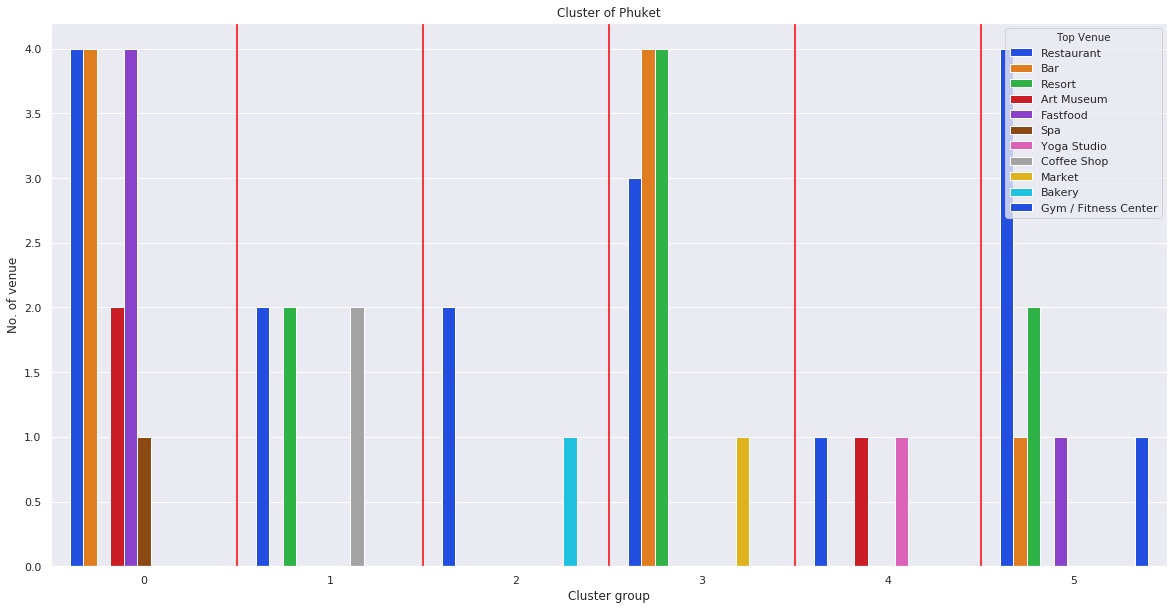

In [58]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Cluster Labels",hue="Top Venue", data=phuket_hist, palette='bright')
plt.title('Cluster of Phuket')
plt.xlabel('Cluster group')
plt.ylabel('No. of venue')
for i in range(0,5):
    plt.axvline(0.5+i,color='red')


From result, we choose cluster 5 to be potential location to invest in new resort

In [95]:
phuket_merged.loc[phuket_merged['Cluster Labels'] == 3]

Postal Code Borough   Neighborhood  Latitude  Longtitude  Cluster Labels  \
7         83100   Rawai          Karon  7.816509   98.299824               3   
19        83120   Kathu          Kathu  7.908981   98.333378               3   
22        83120   Kathu  Tambon Patong  7.903790   98.311680               3   
25        83150  Patong          Kathu  7.898355   98.304875               3   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
7             Hookah Bar                Resort                Market   
19       Thai Restaurant            Hookah Bar                Resort   
22            Hookah Bar       Thai Restaurant                Resort   
25       Thai Restaurant            Hookah Bar                Resort   

      4th Most Common Venue  5th Most Common Venue    6th Most Common Venue  \
7                       Spa         Ice Cream Shop             Burger Joint   
19               Restaurant  Australian Restaurant  Comfort Food Restaurant   
22  Comfort Food Restaurant  Indonesian Restaurant         Greek Restaurant   
25               Restaurant  Australian Restaurant  Comfort Food Restaurant   

   7th Most Common Venue 8th Most Common Venue  9th Most Common Venue  \
7         History Museum           Yoga Studio  Indonesian Restaurant   
19                  Farm                   Zoo           Burger Joint   
22                Market                 Beach                   Farm   
25                  Farm                   Zoo           Burger Joint   

   10th Most Common Venue  
7          Massage Studio  
19                  Diner  
22           Dessert Shop  
25                  Diner

From above df, Kathu is the best potential location in 

In [96]:
#Define get_latlng function to get geospatial location from arcgis (since google is not free now)

kathu_center = [phuket_merged.loc[(phuket_merged['Cluster Labels'] == 3) & (phuket_merged['Neighborhood'] == 'Kathu')].Latitude.values[1],phuket_merged.loc[(phuket_merged['Cluster Labels'] == 3) & (phuket_merged['Neighborhood'] == 'Kathu')].Longtitude.values[1]]


In [97]:
kathu_center

[7.898354930335358, 98.30487519589076]

In [98]:
# !pip install shapely
# import shapely.geometry

!pip install pyproj
import pyproj

import math

def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=47, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=47, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)

print('Coordinate transformation check')
print('-------------------------------')
print('Kathu center longitude={}, latitude={}'.format(kathu_center[1], kathu_center[0]))
x, y = lonlat_to_xy(kathu_center[1], kathu_center[0])
print('Kathu center UTM X={}, Y={}'.format(x, y))
lo, la = xy_to_lonlat(x, y)
print('Kathu center longitude={}, latitude={}'.format(lo, la))

Coordinate transformation check
-------------------------------
Kathu center longitude=98.30487519589076, latitude=7.898354930335358
Kathu center UTM X=423377.1368712119, Y=873124.7326624175
Kathu center longitude=98.30487519589076, latitude=7.898354930335357


In [99]:
kathu_center_x, kathu_center_y = lonlat_to_xy(kathu_center[1], kathu_center[0]) # City center in Cartesian coordinates

k = math.sqrt(3) / 2 # Vertical offset for hexagonal grid cells
x_min = kathu_center_x - 6000
x_step = 600
y_min = kathu_center_y - 6000 - (int(21/k)*k*600 - 12000)/2
y_step = 600 * k 

latitudes = []
longitudes = []
distances_from_center = []
xs = []
ys = []
for i in range(0, int(21/k)):
    y = y_min + i * y_step
    x_offset = 300 if i%2==0 else 0
    for j in range(0, 21):
        x = x_min + j * x_step + x_offset
        distance_from_center = calc_xy_distance(kathu_center_x, kathu_center_y, x, y)
        if (distance_from_center <= 6001):
            lon, lat = xy_to_lonlat(x, y)
            latitudes.append(lat)
            longitudes.append(lon)
            distances_from_center.append(distance_from_center)
            xs.append(x)
            ys.append(y)

print(len(latitudes), 'candidate neighborhood centers generated.')

364 candidate neighborhood centers generated.


In [100]:
map_kathu = folium.Map(location=kathu_center, zoom_start=13)
folium.Marker(kathu_center, popup='Kathu').add_to(map_kathu)
for lat, lon in zip(latitudes, longitudes):
    folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_kathu) 
    folium.Circle([lat, lon], radius=300, color='blue', fill=False).add_to(map_kathu)
    #folium.Marker([lat, lon]).add_to(map_kathu)
map_kathu

OK, we now have the coordinates of centers of neighborhoods/areas to be evaluated, equally spaced (distance from every point to it's neighbors is exactly the same) and within ~6km from Alexanderplatz. 

Let's now use Google Maps API to get approximate addresses of those locations.

In [101]:
# from arcgis.geocoding import reverse_geocode
# from arcgis.gis import GIS
# gis = GIS("https://www.arcgis.com", username, password)
# print("Successful")

In [102]:
addr = reverse_geocode([kathu_center[1],kathu_center[0]])

In [103]:
print('Reverse geocoding check')
print('-----------------------')
print('Address of [{}, {}] is: {}'.format(kathu_center[0], kathu_center[1], addr['address']['LongLabel']))

Reverse geocoding check
-----------------------
Address of [7.898354930335358, 98.30487519589076] is: สำนักงานเทศบาลเมืองป่าตอง ซอยหมู่บ้านประเสริฐทรัพย์ 2 ตำบลป่าตอง อำเภอกะทู้ จังหวัดภูเก็ต 83150


In [104]:
print('Obtaining location addresses: ', end='')
addresses = []
for lat, lon in zip(latitudes, longitudes):
    try:
        address = reverse_geocode([lon,lat])
        if address is None:
            address = 'NO ADDRESS'
#     address = address.replace(', Germany', '') # We don't need country part of address
        addresses.append(address['address']['LongLabel'])
    except:
        address = "Not Found"
        addresses.append(address)
    print(' .', end='')
print(' done.')

Obtaining location addresses:  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done.


In [105]:
addresses[150:170]

['83120, ตำบลกะทู้, อำเภอกะทู้, จังหวัดภูเก็ต, THA',
 '83120, ตำบลกะทู้, อำเภอกะทู้, จังหวัดภูเก็ต, THA',
 'ทางหลวงชนบทภก. 4010 ตำบลวิชิต อำเภอเมืองภูเก็ต จังหวัดภูเก็ต 83000',
 'Not Found',
 'ถนนเรือข้ามฟากท่าเรือหาดป่าตอง-ท่าเรือหาดฟรีด้อม ตำบลป่าตอง อำเภอกะทู้ จังหวัดภูเก็ต 83150',
 'Not Found',
 'Not Found',
 'ถนนเรือข้ามฟากท่าเรือหาดป่าตอง-ท่าเรือหาดฟรีด้อม ตำบลป่าตอง อำเภอกะทู้ จังหวัดภูเก็ต 83150',
 'Not Found',
 'Not Found',
 'ถนนทวีวงค์ ตำบลป่าตอง อำเภอกะทู้ จังหวัดภูเก็ต 83150',
 'เดอะอัชเซียนดา ถนนราษฎร์อุทิศ 200 ปี ตำบลป่าตอง อำเภอกะทู้ จังหวัดภูเก็ต 83150',
 'กิ่งแก้วซักอบรีด ถนนนาใน ตำบลป่าตอง อำเภอกะทู้ จังหวัดภูเก็ต 83150',
 'ถนนทต. ป่าตอง 2034 ตำบลป่าตอง อำเภอกะทู้ จังหวัดภูเก็ต 83150',
 '83150, อำเภอกะทู้, จังหวัดภูเก็ต, THA',
 '83120, ตำบลกะทู้, อำเภอกะทู้, จังหวัดภูเก็ต, THA',
 '83120, ตำบลกะทู้, อำเภอกะทู้, จังหวัดภูเก็ต, THA',
 '83120, ตำบลกะทู้, อำเภอกะทู้, จังหวัดภูเก็ต, THA',
 'ทางหลวงชนบทภก. 4035 ตำบลกะทู้ อำเภอกะทู้ จังหวัดภูเก็ต 83120',
 '131/111 หมู่ 7 ตำบล

Looking good. Let's now place all this into a Pandas dataframe.

In [106]:
df_locations = pd.DataFrame({'Address': addresses,
                             'Latitude': latitudes,
                             'Longitude': longitudes,
                             'X': xs,
                             'Y': ys,
                             'Distance from center': distances_from_center})

df_locations.head(10)

Address  Latitude  Longitude  \
0                                          Not Found  7.846629  98.288635   
1  ทางหลวงแผ่นดิน 4233 ตำบลกะรน อำเภอเมืองภูเก็ต ...  7.846638  98.294077   
2  14/13 หมู่ 1 ตำบลกะรน อำเภอเมืองภูเก็ต จังหวัด...  7.846647  98.299519   
3  ซอยปฏัก 18 ตำบลกะรน อำเภอเมืองภูเก็ต จังหวัดภู...  7.846656  98.304961   
4  83100, ตำบลกะรน, อำเภอเมืองภูเก็ต, จังหวัดภูเก...  7.846665  98.310404   
5  83100, ตำบลกะรน, อำเภอเมืองภูเก็ต, จังหวัดภูเก...  7.846674  98.315846   
6        83130, อำเภอเมืองภูเก็ต, จังหวัดภูเก็ต, THA  7.846683  98.321288   
7                                          Not Found  7.851315  98.280463   
8                                          Not Found  7.851324  98.285905   
9                                          Not Found  7.851333  98.291348   

               X              Y  Distance from center  
0  421577.136871  867408.964997           5992.495307  
1  422177.136871  867408.964997           5840.376700  
2  422777.136871  867408.964997           5747.173218  
3  423377.136871  867408.964997           5715.767665  
4  423977.136871  867408.964997           5747.173218  
5  424577.136871  867408.964997           5840.376700  
6  425177.136871  867408.964997           5992.495307  
7  420677.136871  867928.580240           5855.766389  
8  421277.136871  867928.580240           5604.462508  
9  421877.136871  867928.580240           5408.326913

...and let's now save/persist this data into local file.

In [107]:
df_locations.to_pickle('./locations.pkl') 

### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on restaurants in each neighborhood.

We're interested in venues in 'food' category, but only those that are proper restaurants - coffe shops, pizza places, bakeries etc. are not direct competitors so we don't care about those. So we will include in out list only venues that have 'restaurant' in category name, and we'll make sure to detect and include all the subcategories of specific 'Italian restaurant' category, as we need info on Italian restaurants in the neighborhood.

Foursquare credentials are defined in hidden cell bellow.

In [108]:
# Category IDs corresponding to Italian restaurants were taken from Foursquare web site (https://developer.foursquare.com/docs/resources/categories):

hotel_category = '4bf58dd8d48988d1fa931735' # 'Root' category for all hotel-related venues

resort_categories = ['4bf58dd8d48988d12f951735']

def is_hotel(categories, specific_filter=None):
    hotel_words = ['hotel','hostel','motel','vacation rental']
    hotel = False
    specific = False
    for c in categories:
        category_name = c[0].lower()
        category_id = c[1]
        for r in hotel_words:
            if r in category_name:
                hotel = True
        if 'guesthouse' in category_name:
            hotel = False
        if not(specific_filter is None) and (category_id in specific_filter):
            specific = True
            hotel = True
    return hotel, specific

def get_categories(categories):
    return [(cat['name'], cat['id']) for cat in categories]

def format_address(location):
    address = ', '.join(location['formattedAddress'])
#     address = address.replace(', Deutschland', '')
#     address = address.replace(', Germany', '')
    return address

def get_venues_near_location(lat, lon, category, client_id, client_secret, radius=500, limit=100):
    version = '20200601'
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        client_id, client_secret, version, lat, lon, category, radius, limit)
    try:
        results = requests.get(url).json()['response']['groups'][0]['items']
        venues = [(item['venue']['id'],
                   item['venue']['name'],
                   get_categories(item['venue']['categories']),
                   (item['venue']['location']['lat'], item['venue']['location']['lng']),
                   format_address(item['venue']['location']),
                   item['venue']['location']['distance']) for item in results]        
    except:
        venues = []
    return venues

In [109]:
foursquare_client_id = '0IW4FOPVX4KC41GJ1SOS2YRNV1RFAMKAUN4QRAKJIHUBPFDQ'
foursquare_client_secret = 'B331GGOZC4WZQ2JUQCJJBRDJASH4ERNFPNPEDCQTX2QLHJ2T'

In [110]:
# Let's now go over our neighborhood locations and get nearby restaurants; we'll also maintain a dictionary of all found restaurants and all found italian restaurants

import pickle

def get_hotels(lats, lons):
    hotels = {}
    resorts = {}
    location_hotels = []

    print('Obtaining venues around candidate locations:', end='')
    for lat, lon in zip(lats, lons):
        # Using radius=350 to meke sure we have overlaps/full coverage so we don't miss any restaurant (we're using dictionaries to remove any duplicates resulting from area overlaps)
        venues = get_venues_near_location(lat, lon, hotel_category, foursquare_client_id, foursquare_client_secret, radius=350, limit=100)
        area_hotels = []
        for venue in venues:
            venue_id = venue[0]
            venue_name = venue[1]
            venue_categories = venue[2]
            venue_latlon = venue[3]
            venue_address = venue[4]
            venue_distance = venue[5]
            is_hot, is_resort = is_hotel(venue_categories, specific_filter=resort_categories)
            if is_hot:
                x, y = lonlat_to_xy(venue_latlon[1], venue_latlon[0])
                hotel = (venue_id, venue_name, venue_latlon[0], venue_latlon[1], venue_address, venue_distance, is_resort, x, y)
                if venue_distance<=300:
                    area_hotels.append(hotel)
                hotels[venue_id] = hotel
                if is_resort:
                    resorts[venue_id] = hotel
        location_hotels.append(area_hotels)
        print(' .', end='')
    print(' done.')
    return hotels, resorts, location_hotels

# Try to load from local file system in case we did this before
hotels = {}
resorts = {}
location_hotels = []
loaded = False
try:
    with open('hotels_350.pkl', 'rb') as f:
        hotels = pickle.load(f)
    with open('resorts_350.pkl', 'rb') as f:
        resorts = pickle.load(f)
    with open('location_hotels_350.pkl', 'rb') as f:
        location_hotels = pickle.load(f)
    print('Hotel data loaded.')
    loaded = True
except:
    pass

# If load failed use the Foursquare API to get the data
if not loaded:
    hotels, resorts, location_hotels = get_hotels(latitudes, longitudes)
    
    # Let's persists this in local file system
    with open('hotels_350.pkl', 'wb') as f:
        pickle.dump(hotels, f)
    with open('resorts_350.pkl', 'wb') as f:
        pickle.dump(resorts, f)
    with open('location_hotels_350.pkl', 'wb') as f:
        pickle.dump(location_hotels, f)
        

Hotel data loaded.


In [111]:
import numpy as np

print('Total number of hotels:', len(hotels))
print('Total number of resorts:', len(resorts))
print('Percentage of resorts: {:.2f}%'.format(len(resorts) / len(hotels) * 100))
print('Average number of resorts in neighborhood:', np.array([len(r) for r in location_hotels]).mean())

Total number of hotels: 450
Total number of resorts: 97
Percentage of resorts: 21.56%
Average number of resorts in neighborhood: 1.0192307692307692


In [112]:
print('List of all hotels')
print('-----------------------')
for r in list(hotels.values())[:10]:
    print(r)
print('...')
print('Total:', len(hotels))

List of all hotels
-----------------------
('4bc7930e93bdeee1558737ae', 'Woraburi Phuket Resort And Spa', 7.8438654637695615, 98.29482103782551, '198-200 Patak Rd (Karon Beach), เมืองภูเก็ต, ภูเก็ต, ประเทศไทย', 319, False, 422258.6696146363, 867102.2941087794)
('52d795f3498e88935da26544', 'Ruxxa Desing Hotel', 7.84766920587618, 98.29397398753385, 'ประเทศไทย', 115, False, 422165.9907512233, 867522.9884865682)
('4dc794e4b0fb5556cd243652', 'Movenpick Resort & Spa', 7.84646968281893, 98.29394738732732, 'ตำบลกะรน, ภูเก็ต, ประเทศไทย', 23, True, 422162.83500267175, 867390.3755025418)
('52dfc329498e7839eb019991', 'Sugar Marina Resort-Art-Karon Beach', 7.8497563320560335, 98.29424604543297, '542/1 (Patak Road, Karon Beach), Phuket, Thai 83100, ประเทศไทย', 331, True, 422196.3727014123, 867753.6883525178)
('5886e6eab21014678dfbd0fb', 'Lap Roi Karon Beachfront', 7.8475804, 98.29515, 'Karon, Mueang Phuket District,, อำเภอเมืองภูเก็ต, 푸켓 83100, ประเทศไทย', 158, False, 422295.6270516185, 867512.95223

In [113]:
print('List of Resorts')
print('---------------------------')
for r in list(resorts.values())[:10]:
    print(r)
print('...')
print('Total:', len(resorts))

List of Resorts
---------------------------
('4dc794e4b0fb5556cd243652', 'Movenpick Resort & Spa', 7.84646968281893, 98.29394738732732, 'ตำบลกะรน, ภูเก็ต, ประเทศไทย', 23, True, 422162.83500267175, 867390.3755025418)
('52dfc329498e7839eb019991', 'Sugar Marina Resort-Art-Karon Beach', 7.8497563320560335, 98.29424604543297, '542/1 (Patak Road, Karon Beach), Phuket, Thai 83100, ประเทศไทย', 331, True, 422196.3727014123, 867753.6883525178)
('4bc792f293bdeee13a8737ae', 'Karon Sea Sands Resort Phuket', 7.8472434324278915, 98.29474700146758, '208/2 Karon Road, Karon Beach, ตำบลกะรน, ภูเก็ต, ประเทศไทย', 100, True, 422251.1347281666, 867475.7721430422)
('4bc792f393bdeee13b8737ae', 'Karon Whale Resort Phuket (กะรน เวล รีสอร์ท ภูเก็ต)', 7.8491633522039574, 98.29431295394897, '538/3 Patak Rd, เมืองภูเก็ต, ภูเก็ต 83100, ประเทศไทย', 282, True, 422203.63890041504, 867688.1167559123)
('50dd6048e4b0ab7cd446ef36', 'Lobby @ Movenpick', 7.846068461654141, 98.29681133294424, 'ประเทศไทย', 305, True, 422478.50

In [114]:
map_kathu = folium.Map(location=kathu_center, zoom_start=13)
folium.Marker(kathu_center, popup='Kathu').add_to(map_kathu)
for hot in hotels.values():
    lat = hot[2]; lon = hot[3]
    is_resort = hot[6]
    color = 'red' if is_resort else 'blue'
    folium.CircleMarker([lat, lon], radius=3, color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map_kathu)
map_kathu

Looking good. So now we have all the restaurants in area within few kilometers from Alexanderplatz, and we know which ones are Italian restaurants! We also know which restaurants exactly are in vicinity of every neighborhood candidate center.

This concludes the data gathering phase - we're now ready to use this data for analysis to produce the report on optimal locations for a new Italian restaurant!

## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of Berlin that have low restaurant density, particularly those with low number of Italian restaurants. We will limit our analysis to area ~6km around city center.

In first step we have collected the required **data: location and type (category) of every restaurant within 6km from Berlin center** (Alexanderplatz). We have also **identified Italian restaurants** (according to Foursquare categorization).

Second step in our analysis will be calculation and exploration of '**restaurant density**' across different areas of Berlin - we will use **heatmaps** to identify a few promising areas close to center with low number of restaurants in general (*and* no Italian restaurants in vicinity) and focus our attention on those areas.

In third and final step we will focus on most promising areas and within those create **clusters of locations that meet some basic requirements** established in discussion with stakeholders: we will take into consideration locations with **no more than two restaurants in radius of 250 meters**, and we want locations **without Italian restaurants in radius of 400 meters**. We will present map of all such locations but also create clusters (using **k-means clustering**) of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final 'street level' exploration and search for optimal venue location by stakeholders.

## Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's count the **number of restaurants in every area candidate**:

In [115]:
location_hotels_count = [len(hot) for hot in location_hotels]

df_locations['Hotels in area'] = location_hotels_count

print('Average number of hotels in every area with radius=300m:', np.array(location_hotels_count).mean())

df_locations.head(10)

Average number of hotels in every area with radius=300m: 1.0192307692307692


Address  Latitude  Longitude  \
0                                          Not Found  7.846629  98.288635   
1  ทางหลวงแผ่นดิน 4233 ตำบลกะรน อำเภอเมืองภูเก็ต ...  7.846638  98.294077   
2  14/13 หมู่ 1 ตำบลกะรน อำเภอเมืองภูเก็ต จังหวัด...  7.846647  98.299519   
3  ซอยปฏัก 18 ตำบลกะรน อำเภอเมืองภูเก็ต จังหวัดภู...  7.846656  98.304961   
4  83100, ตำบลกะรน, อำเภอเมืองภูเก็ต, จังหวัดภูเก...  7.846665  98.310404   
5  83100, ตำบลกะรน, อำเภอเมืองภูเก็ต, จังหวัดภูเก...  7.846674  98.315846   
6        83130, อำเภอเมืองภูเก็ต, จังหวัดภูเก็ต, THA  7.846683  98.321288   
7                                          Not Found  7.851315  98.280463   
8                                          Not Found  7.851324  98.285905   
9                                          Not Found  7.851333  98.291348   

               X              Y  Distance from center  Hotels in area  
0  421577.136871  867408.964997           5992.495307               0  
1  422177.136871  867408.964997           5840.376700              12  
2  422777.136871  867408.964997           5747.173218               4  
3  423377.136871  867408.964997           5715.767665               0  
4  423977.136871  867408.964997           5747.173218               0  
5  424577.136871  867408.964997           5840.376700               0  
6  425177.136871  867408.964997           5992.495307               0  
7  420677.136871  867928.580240           5855.766389               0  
8  421277.136871  867928.580240           5604.462508               0  
9  421877.136871  867928.580240           5408.326913               1

OK, now let's calculate the **distance to nearest Italian restaurant from every area candidate center** (not only those within 300m - we want distance to closest one, regardless of how distant it is).

In [116]:
distances_to_resort = []

for area_x, area_y in zip(xs, ys):
    min_distance = 10000
    for res in resorts.values():
        res_x = res[7]
        res_y = res[8]
        d = calc_xy_distance(area_x, area_y, res_x, res_y)
        if d<min_distance:
            min_distance = d
    distances_to_resort.append(min_distance)

df_locations['Distance to Resort'] = distances_to_resort

In [117]:
df_locations.head(10)

Address  Latitude  Longitude  \
0                                          Not Found  7.846629  98.288635   
1  ทางหลวงแผ่นดิน 4233 ตำบลกะรน อำเภอเมืองภูเก็ต ...  7.846638  98.294077   
2  14/13 หมู่ 1 ตำบลกะรน อำเภอเมืองภูเก็ต จังหวัด...  7.846647  98.299519   
3  ซอยปฏัก 18 ตำบลกะรน อำเภอเมืองภูเก็ต จังหวัดภู...  7.846656  98.304961   
4  83100, ตำบลกะรน, อำเภอเมืองภูเก็ต, จังหวัดภูเก...  7.846665  98.310404   
5  83100, ตำบลกะรน, อำเภอเมืองภูเก็ต, จังหวัดภูเก...  7.846674  98.315846   
6        83130, อำเภอเมืองภูเก็ต, จังหวัดภูเก็ต, THA  7.846683  98.321288   
7                                          Not Found  7.851315  98.280463   
8                                          Not Found  7.851324  98.285905   
9                                          Not Found  7.851333  98.291348   

               X              Y  Distance from center  Hotels in area  \
0  421577.136871  867408.964997           5992.495307               0   
1  422177.136871  867408.964997           5840.376700              12   
2  422777.136871  867408.964997           5747.173218               4   
3  423377.136871  867408.964997           5715.767665               0   
4  423977.136871  867408.964997           5747.173218               0   
5  424577.136871  867408.964997           5840.376700               0   
6  425177.136871  867408.964997           5992.495307               0   
7  420677.136871  867928.580240           5855.766389               0   
8  421277.136871  867928.580240           5604.462508               0   
9  421877.136871  867928.580240           5408.326913               1   

   Distance to Resort  
0          585.993064  
1           23.454483  
2          110.099870  
3          688.383055  
4         1286.709166  
5         1886.099077  
6         2470.174479  
7         1247.470191  
8          798.277235  
9          256.211544

In [118]:
print('Average distance to closest resort from each area center:', df_locations['Distance to Resort'].mean())

Average distance to closest resort from each area center: 1252.9643826505437


OK, so **on average Italian restaurant can be found within ~500m** from every area center candidate. That's fairly close, so we need to filter our areas carefully!

Let's crete a map showing **heatmap / density of restaurants** and try to extract some meaningfull info from that. Also, let's show **borders of Berlin boroughs** on our map and a few circles indicating distance of 1km, 2km and 3km from Alexanderplatz.

In [119]:
import requests

In [120]:
# berlin_boroughs_url = 'https://raw.githubusercontent.com/m-hoerz/berlin-shapes/master/berliner-bezirke.geojson'
# berlin_boroughs = requests.get(berlin_boroughs_url).json()

# def boroughs_style(feature):
#     return { 'color': 'blue', 'fill': False }

In [121]:
hotel_latlons = [[res[2], res[3]] for res in hotels.values()]

resort_latlons = [[res[2], res[3]] for res in resorts.values()]

In [122]:
from folium import plugins
from folium.plugins import HeatMap

map_kathu= folium.Map(location=kathu_center, zoom_start=13)
folium.TileLayer('cartodbpositron').add_to(map_kathu) #cartodbpositron cartodbdark_matter
HeatMap(hotel_latlons).add_to(map_kathu)
folium.Marker(kathu_center).add_to(map_kathu)
folium.Circle(kathu_center, radius=1000, fill=False, color='white').add_to(map_kathu)
folium.Circle(kathu_center, radius=2000, fill=False, color='white').add_to(map_kathu)
folium.Circle(kathu_center, radius=3000, fill=False, color='white').add_to(map_kathu)
map_kathu

Looks like a few pockets of low restaurant density closest to city center can be found **south, south-east and east from Alexanderplatz**. 

Let's create another heatmap map showing **heatmap/density of Italian restaurants** only.

In [123]:
map_kathu = folium.Map(location=kathu_center, zoom_start=13)
folium.TileLayer('cartodbpositron').add_to(map_kathu) #cartodbpositron cartodbdark_matter
HeatMap(resort_latlons).add_to(map_kathu)
folium.Marker(kathu_center).add_to(map_kathu)
folium.Circle(kathu_center, radius=1000, fill=False, color='white').add_to(map_kathu)
folium.Circle(kathu_center, radius=2000, fill=False, color='white').add_to(map_kathu)
folium.Circle(kathu_center, radius=3000, fill=False, color='white').add_to(map_kathu)
map_kathu

This map is not so 'hot' (Italian restaurants represent a subset of ~15% of all restaurants in Berlin) but it also indicates higher density of existing Italian restaurants directly north and west from Alexanderplatz, with closest pockets of **low Italian restaurant density positioned east, south-east and south from city center**.

Based on this we will now focus our analysis on areas *south-west, south, south-east and east from Berlin center* - we will move the center of our area of interest and reduce it's size to have a radius of **2.5km**. This places our location candidates mostly in boroughs **Kreuzberg and Friedrichshain** (another potentially interesting borough is **Prenzlauer Berg** with large low restaurant density north-east from city center, however this borough is less interesting to stakeholders as it's mostly residental and less popular with tourists).

In [124]:
roi_x_min = kathu_center_x - 2000
roi_y_max = kathu_center_y + 1000
roi_width = 5000
roi_height = 5000
roi_center_x = roi_x_min + 2000
roi_center_y = roi_y_max - 1000
roi_center_lon, roi_center_lat = xy_to_lonlat(roi_center_x, roi_center_y)
roi_center = [roi_center_lat, roi_center_lon]

Not bad - this nicely covers all the pockets of low restaurant density in Kreuzberg and Friedrichshain closest to Berlin center.

Let's also create new, more dense grid of location candidates restricted to our new region of interest (let's make our location candidates 100m appart).

In [125]:
k = math.sqrt(3) / 2 # Vertical offset for hexagonal grid cells
x_step = 100
y_step = 100 * k 
roi_y_min = roi_center_y - 2500

roi_latitudes = []
roi_longitudes = []
roi_xs = []
roi_ys = []
for i in range(0, int(51/k)):
    y = roi_y_min + i * y_step
    x_offset = 50 if i%2==0 else 0
    for j in range(0, 51):
        x = roi_x_min + j * x_step + x_offset
        d = calc_xy_distance(roi_center_x, roi_center_y, x, y)
        if (d <= 2501):
            lon, lat = xy_to_lonlat(x, y)
            roi_latitudes.append(lat)
            roi_longitudes.append(lon)
            roi_xs.append(x)
            roi_ys.append(y)

print(len(roi_latitudes), 'candidate neighborhood centers generated.')

2155 candidate neighborhood centers generated.


OK. Now let's calculate two most important things for each location candidate: **number of restaurants in vicinity** (we'll use radius of **250 meters**) and **distance to closest Italian restaurant**.

In [126]:
def count_hotels_nearby(x, y, hotels, radius=250):    
    count = 0
    for hot in hotels.values():
        hot_x = hot[7]; hot_y = hot[8]
        d = calc_xy_distance(x, y, hot_x, hot_y)
        if d<=radius:
            count += 1
    return count

def find_nearest_hotel(x, y, hotels):
    d_min = 100000
    for hot in hotels.values():
        hot_x = hot[7]; hot_y = hot[8]
        d = calc_xy_distance(x, y, hot_x, hot_y)
        if d<=d_min:
            d_min = d
    return d_min

roi_hotel_counts = []
roi_resort_distances = []

print('Generating data on location candidates... ', end='')
for x, y in zip(roi_xs, roi_ys):
    count = count_hotels_nearby(x, y, hotels, radius=250)
    roi_hotel_counts.append(count)
    distance = find_nearest_hotel(x, y, resorts) #find nearest resorts
    roi_resort_distances.append(distance)
print('done.')


Generating data on location candidates... done.


In [127]:
# Let's put this into dataframe
df_roi_locations = pd.DataFrame({'Latitude':roi_latitudes,
                                 'Longitude':roi_longitudes,
                                 'X':roi_xs,
                                 'Y':roi_ys,
                                 'Hotels nearby':roi_hotel_counts,
                                 'Distance to resort':roi_resort_distances})

df_roi_locations.head(10)

Latitude  Longitude              X              Y  Hotels nearby  \
0  7.875742  98.304459  423327.136871  870624.732662              0   
1  7.875743  98.305367  423427.136871  870624.732662              0   
2  7.876517  98.299469  422777.136871  870711.335203              1   
3  7.876518  98.300376  422877.136871  870711.335203              1   
4  7.876520  98.301283  422977.136871  870711.335203              0   
5  7.876521  98.302190  423077.136871  870711.335203              0   
6  7.876523  98.303097  423177.136871  870711.335203              0   
7  7.876524  98.304005  423277.136871  870711.335203              0   
8  7.876526  98.304912  423377.136871  870711.335203              0   
9  7.876527  98.305819  423477.136871  870711.335203              0   

   Distance to resort  
0          741.908183  
1          805.624372  
2          513.892370  
3          508.563925  
4          516.952746  
5          543.914531  
6          586.895130  
7          642.688703  
8          708.273707  
9          781.187891

OK. Let us now **filter** those locations: we're interested only in **locations with no more than two restaurants in radius of 250 meters**, and **no Italian restaurants in radius of 400 meters**.

In [128]:
good_hot_count = np.array((df_roi_locations['Hotels nearby']<=2))
print('Locations with no more than two hotels nearby:', good_hot_count.sum())

good_res_distance = np.array(df_roi_locations['Distance to resort']>=200)
print('Locations with no resort within 200m:', good_res_distance.sum())

good_locations = np.logical_and(good_hot_count, good_res_distance)
print('Locations with both conditions met:', good_locations.sum())

df_good_locations = df_roi_locations[good_locations]


Locations with no more than two hotels nearby: 1576
Locations with no resort within 200m: 1777
Locations with both conditions met: 1552


Let's see how this looks on a map.

In [129]:
good_latitudes = df_good_locations['Latitude'].values
good_longitudes = df_good_locations['Longitude'].values

good_locations = [[lat, lon] for lat, lon in zip(good_latitudes, good_longitudes)]

map_kathu = folium.Map(location=roi_center, zoom_start=14)
folium.TileLayer('cartodbpositron').add_to(map_kathu)
HeatMap(hotel_latlons).add_to(map_kathu)
folium.Circle(roi_center, radius=2500, color='white', fill=True, fill_opacity=0.6).add_to(map_kathu)
folium.Marker(kathu_center).add_to(map_kathu)
for lat, lon in zip(good_latitudes, good_longitudes):
    folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_kathu) 
map_kathu

Looking good. We now have a bunch of locations fairly close to Alexanderplatz (mostly in Kreuzberg, Friedrichshain and south-east corner of Mitte boroughs), and we know that each of those locations has no more than two restaurants in radius of 250m, and no Italian restaurant closer than 400m. Any of those locations is a potential candidate for a new Italian restaurant, at least based on nearby competition.

Let's now show those good locations in a form of heatmap:

In [130]:
map_kathu = folium.Map(location=roi_center, zoom_start=14)
HeatMap(good_locations, radius=25).add_to(map_kathu)
folium.Marker(kathu_center).add_to(map_kathu)
for lat, lon in zip(good_latitudes, good_longitudes):
    folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_kathu)
map_kathu

## Results and Discussion <a name="results"></a>

Our analysis shows that although there is a great number of restaurants in Berlin (~2000 in our initial area of interest which was 12x12km around Alexanderplatz), there are pockets of low restaurant density fairly close to city center. Highest concentration of restaurants was detected north and west from Alexanderplatz, so we focused our attention to areas south, south-east and east, corresponding to boroughs Kreuzberg, Friedrichshain and south-east corner of central Mitte borough. Another borough was identified as potentially interesting (Prenzlauer Berg, north-east from Alexanderplatz), but our attention was focused on Kreuzberg and Friedrichshain which offer a combination of popularity among tourists, closeness to city center, strong socio-economic dynamics *and* a number of pockets of low restaurant density.

After directing our attention to this more narrow area of interest (covering approx. 5x5km south-east from Alexanderplatz) we first created a dense grid of location candidates (spaced 100m appart); those locations were then filtered so that those with more than two restaurants in radius of 250m and those with an Italian restaurant closer than 400m were removed.

Those location candidates were then clustered to create zones of interest which contain greatest number of location candidates. Addresses of centers of those zones were also generated using reverse geocoding to be used as markers/starting points for more detailed local analysis based on other factors.

Result of all this is 15 zones containing largest number of potential new restaurant locations based on number of and distance to existing venues - both restaurants in general and Italian restaurants particularly. This, of course, does not imply that those zones are actually optimal locations for a new restaurant! Purpose of this analysis was to only provide info on areas close to Berlin center but not crowded with existing restaurants (particularly Italian) - it is entirely possible that there is a very good reason for small number of restaurants in any of those areas, reasons which would make them unsuitable for a new restaurant regardless of lack of competition in the area. Recommended zones should therefore be considered only as a starting point for more detailed analysis which could eventually result in location which has not only no nearby competition but also other factors taken into account and all other relevant conditions met.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify Berlin areas close to center with low number of restaurants (particularly Italian restaurants) in order to aid stakeholders in narrowing down the search for optimal location for a new Italian restaurant. By calculating restaurant density distribution from Foursquare data we have first identified general boroughs that justify further analysis (Kreuzberg and Friedrichshain), and then generated extensive collection of locations which satisfy some basic requirements regarding existing nearby restaurants. Clustering of those locations was then performed in order to create major zones of interest (containing greatest number of potential locations) and addresses of those zone centers were created to be used as starting points for final exploration by stakeholders.

Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.